In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'NanumGothic'
plt.style.use('ggplot')

In [2]:
data = pd.read_csv("C:\\Users\\user\\OneDrive\\바탕 화면\\rwt_china_raw.csv",encoding='ANSI')

data

,Unnamed: 0,지점,지점명,일시,풍속,강수량,기온
0,127994,50527,하일라르,2015-12-28 03:00,2.0,NaN,-28.8
1,127995,50527,하일라르,2015-12-28 06:00,2.0,NaN,-24.2
2,127996,50527,하일라르,2015-12-28 09:00,4.0,NaN,-26.6
3,127997,50527,하일라르,2015-12-28 12:00,3.0,NaN,-25.3
4,127998,50527,하일라르,2015-12-28 15:00,6.0,NaN,-29.5
...,...,...,...,...,...,...,...
1115542,106881,59981,시사다오,2021-08-17 12:00,1.0,NaN,28.8
1115543,106882,59981,시사다오,2021-08-17 15:00,1.0,NaN,28.3
1115544,106883,59981,시사다오,2021-08-17 18:00,0.0,NaN,27.6
1115545,106884,59981,시사다오,2021-08-17 21:00,2.0,NaN,27.8


In [3]:
data['일시'] = data['일시'].astype('string')

data['일시'] = data['일시'].str[:10]

data['일시'] = data['일시'].astype('datetime64')

data = data.query('일시.dt.dayofweek == 0')

data['국가'] = '중국'

data

<ipython-input-3-6ba669177057>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['국가'] = '중국'


,Unnamed: 0,지점,지점명,일시,풍속,강수량,기온,국가
0,127994,50527,하일라르,2015-12-28,2.0,NaN,-28.8,중국
1,127995,50527,하일라르,2015-12-28,2.0,NaN,-24.2,중국
2,127996,50527,하일라르,2015-12-28,4.0,NaN,-26.6,중국
3,127997,50527,하일라르,2015-12-28,3.0,NaN,-25.3,중국
4,127998,50527,하일라르,2015-12-28,6.0,NaN,-29.5,중국
...,...,...,...,...,...,...,...,...
1115533,106872,59981,시사다오,2021-08-16,2.0,NaN,31.4,중국
1115534,106873,59981,시사다오,2021-08-16,1.0,NaN,29.0,중국
1115535,106874,59981,시사다오,2021-08-16,3.0,NaN,28.5,중국
1115536,106875,59981,시사다오,2021-08-16,1.0,NaN,27.8,중국


In [4]:
data = data[data['일시']<='2021-06-28']

data = data.iloc[:,1:]

data

,지점,지점명,일시,풍속,강수량,기온,국가
0,50527,하일라르,2015-12-28,2.0,NaN,-28.8,중국
1,50527,하일라르,2015-12-28,2.0,NaN,-24.2,중국
2,50527,하일라르,2015-12-28,4.0,NaN,-26.6,중국
3,50527,하일라르,2015-12-28,3.0,NaN,-25.3,중국
4,50527,하일라르,2015-12-28,6.0,NaN,-29.5,중국
...,...,...,...,...,...,...,...
1115148,59981,시사다오,2021-06-28,7.0,NaN,30.8,중국
1115149,59981,시사다오,2021-06-28,4.0,NaN,29.5,중국
1115150,59981,시사다오,2021-06-28,3.0,NaN,29.2,중국
1115151,59981,시사다오,2021-06-28,6.0,NaN,29.2,중국


In [5]:
data.groupby(['일시']).mean()

,지점,풍속,강수량,기온
일시,,,,
2015-12-28,55201.048561,2.338129,0.708333,-0.262050
2016-01-04,55201.358491,2.358491,2.372093,0.026772
2016-01-11,55201.660883,2.552050,1.794366,-2.603943
2016-01-18,55201.358491,2.481132,1.052778,-3.982704
2016-01-25,55201.358491,2.212264,-4.252381,-6.542610
...,...,...,...,...
2021-05-31,55198.115324,2.718799,5.530818,20.851501
2021-06-07,55192.106181,2.575277,6.135652,22.328051
2021-06-14,55201.358491,2.808847,6.745064,22.666352


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


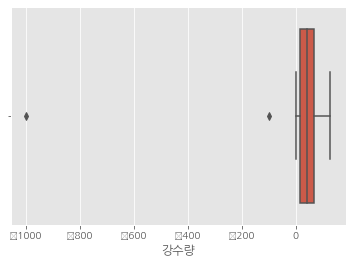

In [6]:
sns.boxplot(data['강수량'].unique())
plt.xlabel('강수량')
plt.show()

In [7]:
data[data['강수량']<0] # 2% 비율이고 값을 알 수 없으므로 drop하기

,지점,지점명,일시,풍속,강수량,기온,국가
389,50527,하일라르,2016-02-15,3.0,-99.8,-16.6,중국
391,50527,하일라르,2016-02-15,4.0,-99.8,-14.5,중국
393,50527,하일라르,2016-02-15,5.0,-99.8,-19.1,중국
394,50527,하일라르,2016-02-15,3.0,-99.8,-18.0,중국
395,50527,하일라르,2016-02-15,3.0,-99.8,-18.2,중국
...,...,...,...,...,...,...,...
1100479,58027,쉬저우,2021-02-08,3.0,-999.0,1.6,중국
1101579,58238,난징,2021-04-19,5.0,-999.0,14.9,중국
1105478,58666,다천다오,2021-02-08,10.0,-999.0,7.3,중국
1113583,59948,야샨,2021-02-08,8.0,-999.0,19.2,중국


In [10]:
data = data[(data['강수량']>=0) | (data['강수량'].isna())] # 강수량 음수 제거

data

,지점,지점명,일시,풍속,강수량,기온,국가
0,50527,하일라르,2015-12-28,2.0,NaN,-28.8,중국
1,50527,하일라르,2015-12-28,2.0,NaN,-24.2,중국
2,50527,하일라르,2015-12-28,4.0,NaN,-26.6,중국
3,50527,하일라르,2015-12-28,3.0,NaN,-25.3,중국
4,50527,하일라르,2015-12-28,6.0,NaN,-29.5,중국
...,...,...,...,...,...,...,...
1115148,59981,시사다오,2021-06-28,7.0,NaN,30.8,중국
1115149,59981,시사다오,2021-06-28,4.0,NaN,29.5,중국
1115150,59981,시사다오,2021-06-28,3.0,NaN,29.2,중국
1115151,59981,시사다오,2021-06-28,6.0,NaN,29.2,중국


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


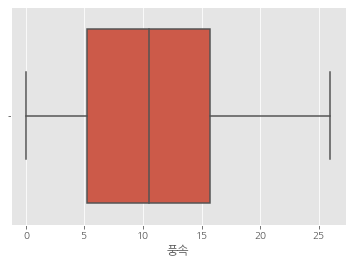

In [12]:
sns.boxplot(data['풍속'].unique())
plt.xlabel('풍속')
plt.show()

# 이상치 없음.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


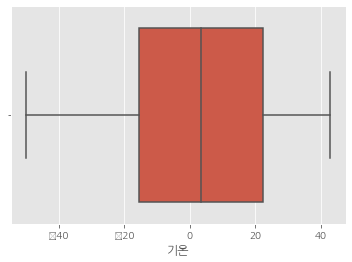

In [13]:
sns.boxplot(data['기온'].unique())
plt.xlabel('기온')
plt.show()

# 이상치 없음.

In [35]:
chn_rwt = pd.DataFrame(data.groupby('일시').mean())

chn_rwt = chn_rwt[['풍속','강수량','기온']]

chn_rwt

,풍속,강수량,기온
일시,,,
2015-12-28,2.338129,0.708333,-0.262050
2016-01-04,2.358491,2.372093,0.026772
2016-01-11,2.552050,1.794366,-2.603943
2016-01-18,2.481132,1.052778,-3.982704
2016-01-25,2.214173,0.525000,-6.559213
...,...,...,...
2021-05-31,2.718799,5.530818,20.851501
2021-06-07,2.575277,6.135652,22.328051
2021-06-14,2.808847,6.745064,22.666352


In [38]:
chn_rwt.describe()

,풍속,강수량,기온
count,288.000000,287.000000,288.000000
mean,2.441163,3.006765,12.015510
std,0.286882,2.139905,9.517001
min,1.771739,0.033333,-6.559213
25%,2.250591,1.510653,3.128850
50%,2.406681,2.604167,13.320644
75%,2.593325,4.041554,21.004752
max,4.026316,12.142105,26.110147


In [36]:
chn_rwt.isna().sum()

풍속     0
강수량    1
기온     0
dtype: int64

In [37]:
chn_rwt[chn_rwt['강수량'].isna()] # 2021년 2월 강수량 평균으로 대치해보자.

,풍속,강수량,기온
일시,,,
2021-02-22,2.795455,NaN,6.725


In [42]:
chn_rwt['일시'] = chn_rwt.index

chn_rwt

,풍속,강수량,기온,일시
일시,,,,
2015-12-28,2.338129,0.708333,-0.262050,2015-12-28
2016-01-04,2.358491,2.372093,0.026772,2016-01-04
2016-01-11,2.552050,1.794366,-2.603943,2016-01-11
2016-01-18,2.481132,1.052778,-3.982704,2016-01-18
2016-01-25,2.214173,0.525000,-6.559213,2016-01-25
...,...,...,...,...
2021-05-31,2.718799,5.530818,20.851501,2021-05-31
2021-06-07,2.575277,6.135652,22.328051,2021-06-07
2021-06-14,2.808847,6.745064,22.666352,2021-06-14


In [50]:
chn_rwt['일시'] = chn_rwt['일시'].astype('string')

rain_2102 = chn_rwt[chn_rwt['일시'].str.contains('2021-02')].mean()['강수량'] # 2021년 2월 강수량 평균으로 결측값 대치

chn_rwt = chn_rwt.fillna(rain_2102)

chn_rwt.isna().sum()

<ipython-input-50-42e7b570feee>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  rain_2102 = chn_rwt[chn_rwt['일시'].str.contains('2021-02')].mean()['강수량']


풍속     0
강수량    0
기온     0
일시     0
dtype: int64

In [51]:
chn_rwt['일시'] = chn_rwt['일시'].astype('datetime64')

In [52]:
data['지점명'].unique()

array(['하일라르', '치치하얼', '퉁허', '알타이', '커라마이', '이닝', '우루무치', '쿠쳐', '쿠얼러',
       '카스', '타중', '뤄창', '호탄', '하미', '에진 치', '마쭝산', '둔황', '바옌모드', '주취안',
       '민친', '두란', '시닝', '위중', '에렌호트', '하리우트', '호호트', '인촨', '타이유안', '얀 안',
       '짜루터 기', '시린하오터', '창춘', '크히펭', '옌지', '선양', '베이징', '텐진', '다롄', '지난',
       '칭다오', '스취안허', '선자', '라사', '퉈퉈허', '유슈', '다르', '뤄얼가이', '쏙시안', '캄도',
       '웬지앙', '시창', '텅충', '쿤밍', '쓰마오', '멍지', '정저우', '한중', '징허', '이창',
       '우언', '크홍킹', '창사', '즈장', '구이양', '간저우', '쉬저우', '난징', '상하이', '난창',
       '추샨', '다천다오', '푸저우', '타이베이', '바이써', '광저우', '산터우', '난닝', '하이커우',
       '야샨', '시사다오'], dtype=object)